# Try features made from image histogram

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

In [3]:
from common.dataflow import get_train_df, get_test_df, get_image, get_target, get_inc_angle
from common.dataflow_visu_utils import display_image

train_df = get_train_df()

In [4]:
train_df.loc[:, 'is_ship'] = train_df['is_iceberg'].apply(lambda x: 1 if x == 0 else 0) 

In [5]:
from common.dataflow import IcebergDataset
norm_b1 = IcebergDataset.norm_b1
norm_b2 = IcebergDataset.norm_b2

from functools import partial

def get_norm_band(b, f=norm_b1):
    return f(np.array(b[0]), b[1]).tolist()

train_df.loc[:, "nband_1"] = train_df[['band_1', 'inc_angle']].apply(partial(get_norm_band, f=norm_b1), axis=1)
train_df.loc[:, "nband_2"] = train_df[['band_2', 'inc_angle']].apply(partial(get_norm_band, f=norm_b2), axis=1)
train_df.loc[:, "nband_3"] = train_df.loc[:, "nband_1"] + train_df.loc[:, "nband_2"] 

In [6]:
train_df.loc[:, 'min_b1'] = train_df['nband_1'].apply(np.min)
train_df.loc[:, 'avg_b1'] = train_df['nband_1'].apply(np.mean)
train_df.loc[:, 'max_b1'] = train_df['nband_1'].apply(np.max)

train_df.loc[:, 'min_b2'] = train_df['nband_2'].apply(np.min)
train_df.loc[:, 'avg_b2'] = train_df['nband_2'].apply(np.mean)
train_df.loc[:, 'max_b2'] = train_df['nband_2'].apply(np.max)

train_df.loc[:, 'min_b3'] = train_df['nband_3'].apply(np.min)
train_df.loc[:, 'avg_b3'] = train_df['nband_3'].apply(np.mean)
train_df.loc[:, 'max_b3'] = train_df['nband_3'].apply(np.max)

train_df.loc[:, '10p_b1'] = train_df['nband_1'].apply(lambda x: np.percentile(x, q=10.0))
train_df.loc[:, '10p_b2'] = train_df['nband_2'].apply(lambda x: np.percentile(x, q=10.0))
train_df.loc[:, '10p_b3'] = train_df['nband_3'].apply(lambda x: np.percentile(x, q=10.0))

In [7]:
def to_linear(b):
    return np.power(20, 0.1 * np.array(b))

train_df.loc[:, 'nband_mix'] = train_df['nband_1'].apply(to_linear) * train_df['nband_2'].apply(to_linear)

In [8]:
def display_min_avg_max(df, title):
    plt.figure(figsize=(18, 4))
    samples = list(range(df.shape[0]))
    plt.subplot(131)
    plt.title(title)
    plt.scatter(df['min_b1'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b1'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b1'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b1'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-30, 20])
    plt.xlabel("b1 min/10%/avg/max values")
    plt.subplot(132)
    plt.scatter(df['min_b2'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b2'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b2'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b2'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-35, 5])
    plt.xlabel("b2 min/10%/avg/max values")
    plt.subplot(133)
    plt.scatter(df['min_b3'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b3'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b3'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b3'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-35, 5])
    plt.xlabel("b3 min/10%/avg/max values")

In [9]:
train_df.loc[:, 'avg_min_b1'] = train_df['avg_b1'] - train_df['min_b1']
train_df.loc[:, 'avg_min_b2'] = train_df['avg_b2'] - train_df['min_b2']
train_df.loc[:, 'avg_min_b3'] = train_df['avg_b3'] - train_df['min_b3']

train_df.loc[:, 'max_avg_b1'] = train_df['max_b1'] - train_df['avg_b1']
train_df.loc[:, 'max_avg_b2'] = train_df['max_b2'] - train_df['avg_b2']
train_df.loc[:, 'max_avg_b3'] = train_df['max_b3'] - train_df['avg_b3']

train_df.loc[:, 'max_min_b1'] = train_df['max_b1'] - train_df['min_b1']
train_df.loc[:, 'max_min_b2'] = train_df['max_b2'] - train_df['min_b2']
train_df.loc[:, 'max_min_b3'] = train_df['max_b3'] - train_df['min_b3']

In [10]:
train_df.loc[:, 'max_b21'] = train_df['max_b2'] - train_df['max_b1']

Display min, avg, max values


In [11]:
train_ships_df = train_df[train_df['is_iceberg'] == 0]
train_icebergs_df = train_df[train_df['is_iceberg'] == 1]

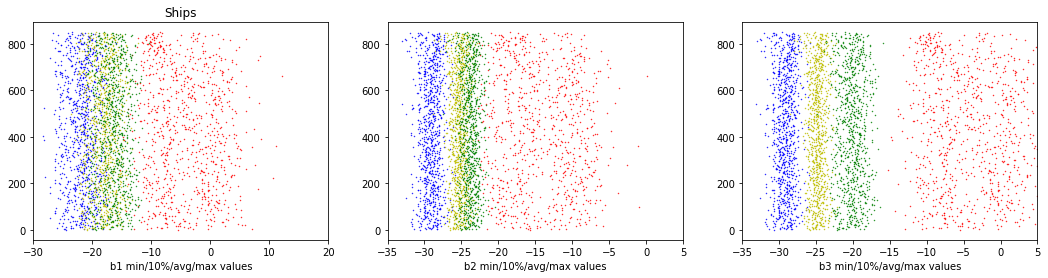

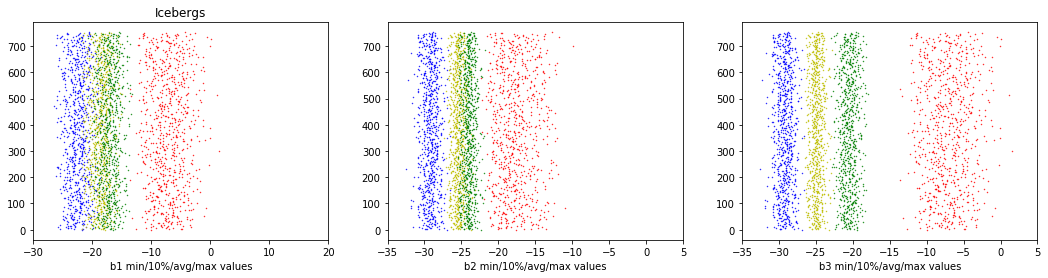

In [10]:
display_min_avg_max(train_ships_df, "Ships")
display_min_avg_max(train_icebergs_df, "Icebergs")

In [11]:
def display_max_avg_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['max_avg_b1'].hist(bins=50)
    plt.xlabel("b1 max-avg")
    plt.xlim([0, 30])
    plt.subplot(132)
    df['max_avg_b2'].hist(bins=50)
    plt.xlabel("b2 max-avg")
    plt.xlim([0, 30])    
    plt.subplot(133)
    df['max_avg_b3'].hist(bins=50)    
    plt.xlabel("b3 max-avg")    
    plt.xlim([0, 30])    
    
def display_avg_min_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['avg_min_b1'].hist(bins=50)
    plt.xlabel("b1 avg-min")        
    plt.xlim([0, 15])    
    plt.subplot(132)
    df['avg_min_b2'].hist(bins=50)
    plt.xlabel("b2 avg-min")        
    plt.xlim([0, 15])    
    plt.subplot(133)
    df['avg_min_b3'].hist(bins=50)
    plt.xlabel("b3 avg-min") 
    plt.xlim([0, 15])
    
def display_max_min_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['max_min_b1'].hist(bins=50)
    plt.xlabel("b1 max-min")    
    plt.xlim([5, 50])    
    plt.subplot(132)
    df['max_min_b2'].hist(bins=50)
    plt.xlabel("b2 max-min")        
    plt.xlim([5, 50])    
    plt.subplot(133)
    df['max_min_b3'].hist(bins=50)
    plt.xlabel("b3 max-min")     
    plt.xlim([5, 50])    

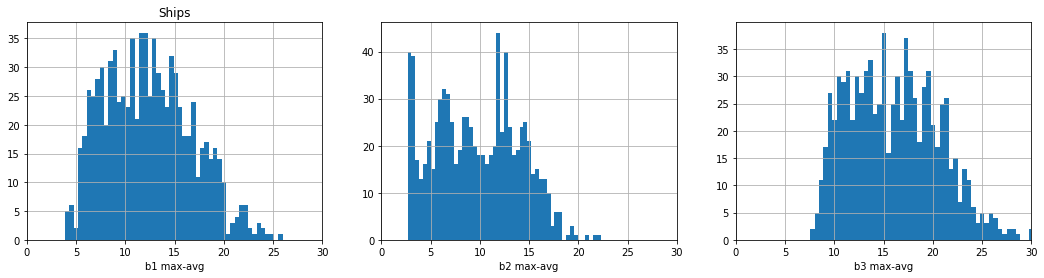

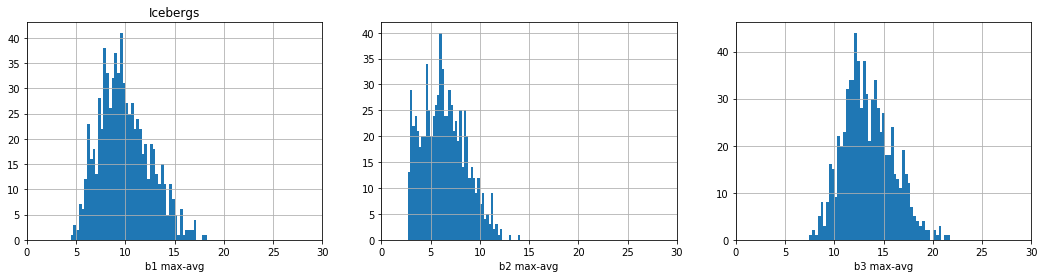

In [12]:
display_max_avg_distances(train_ships_df, "Ships")
display_max_avg_distances(train_icebergs_df, "Icebergs")

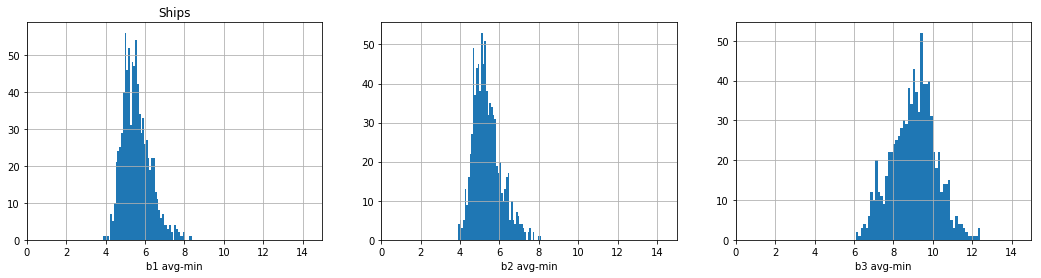

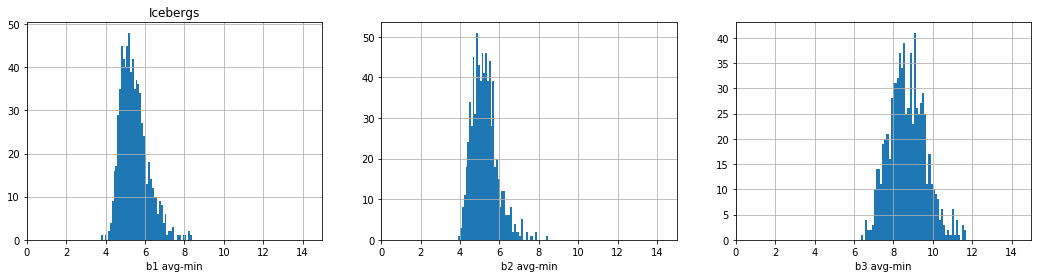

In [13]:
display_avg_min_distances(train_ships_df, "Ships")
display_avg_min_distances(train_icebergs_df, "Icebergs")

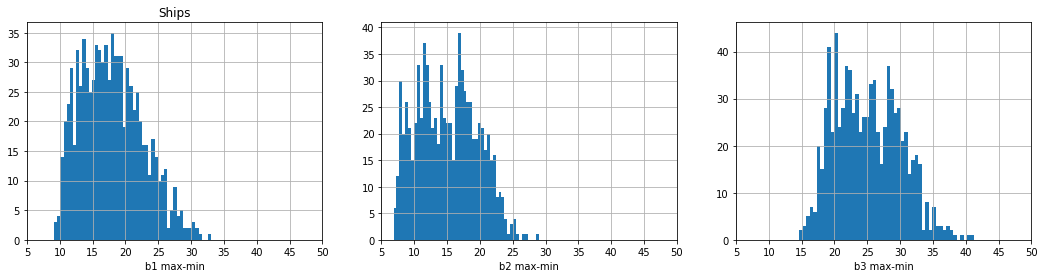

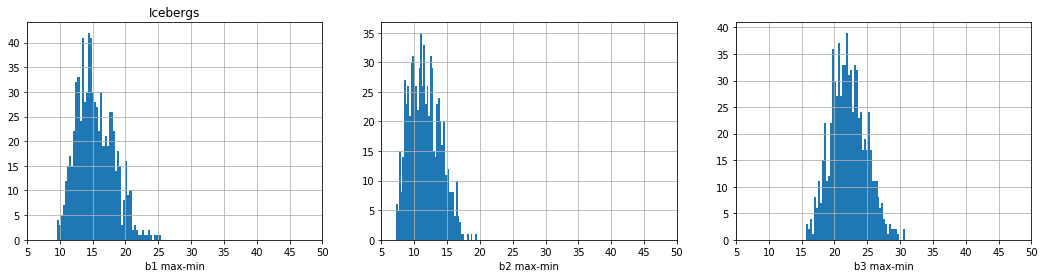

In [14]:
display_max_min_distances(train_ships_df, "Ships")
display_max_min_distances(train_icebergs_df, "Icebergs")

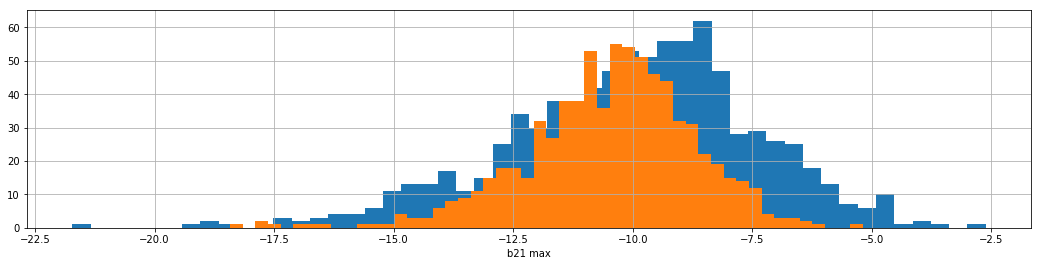

In [14]:
plt.figure(figsize=(18, 4))
train_ships_df['max_b21'].hist(bins=50)
plt.xlabel("b21 max")
train_icebergs_df['max_b21'].hist(bins=50)

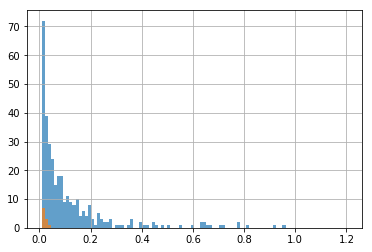

In [11]:
train_ships_df['nband_mix'].apply(np.max).hist(bins=100, range=[0.01, 1.2], alpha=0.7)
train_icebergs_df['nband_mix'].apply(np.max).hist(bins=100, range=[0.01, 1.2], alpha=0.7)

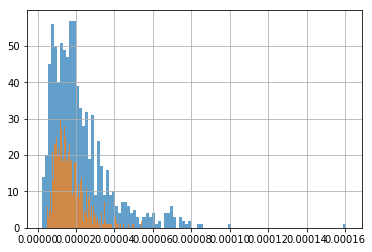

In [638]:
train_ships_df['nband_mix'].apply(np.min).hist(bins=100, alpha=0.7)
train_icebergs_df['nband_mix'].apply(np.min).hist(bins=100, alpha=0.7)

In [12]:
train_df.loc[:, 'nband_mix_max'] = train_df['nband_mix'].apply(np.max)

In [13]:
train_df.loc[:, 'nband_mix_max'] = train_df['nband_mix'].apply(np.max)

In [14]:
useful_features = [
    'max_b21',
    'max_avg_b1', 'max_avg_b2',
    'inc_angle',
    'nband_mix_max'
]

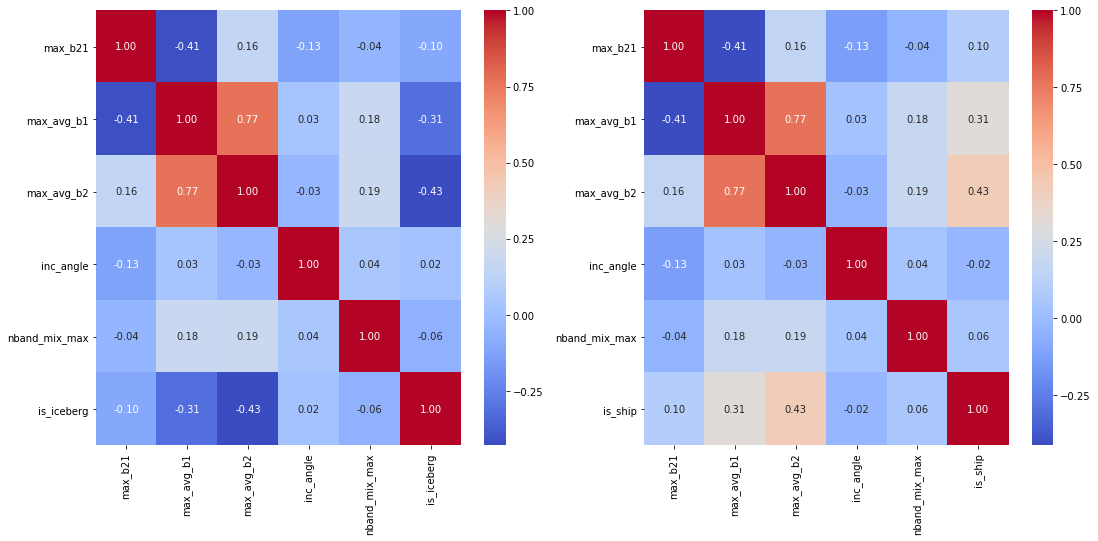

In [15]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
g = sns.heatmap(train_df[useful_features + ['is_iceberg']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.subplot(122)
g = sns.heatmap(train_df[useful_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [16]:
for name in useful_features:
    new_name = 'inv_%s' % name
    train_df.loc[:, new_name] = train_df[name].apply(lambda x: 1.0/(x + 1.0))

In [17]:
train_df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'is_ship',
       'nband_1', 'nband_2', 'nband_3', 'min_b1', 'avg_b1', 'max_b1', 'min_b2',
       'avg_b2', 'max_b2', 'min_b3', 'avg_b3', 'max_b3', '10p_b1', '10p_b2',
       '10p_b3', 'nband_mix', 'avg_min_b1', 'avg_min_b2', 'avg_min_b3',
       'max_avg_b1', 'max_avg_b2', 'max_avg_b3', 'max_min_b1', 'max_min_b2',
       'max_min_b3', 'max_b21', 'nband_mix_max', 'inv_max_b21',
       'inv_max_avg_b1', 'inv_max_avg_b2', 'inv_inc_angle',
       'inv_nband_mix_max'],
      dtype='object')

In [18]:
useful_features = [
    'max_b21',
    'max_avg_b1', 
    'max_avg_b2',
    'inv_inc_angle',
    'nband_mix_max'
]

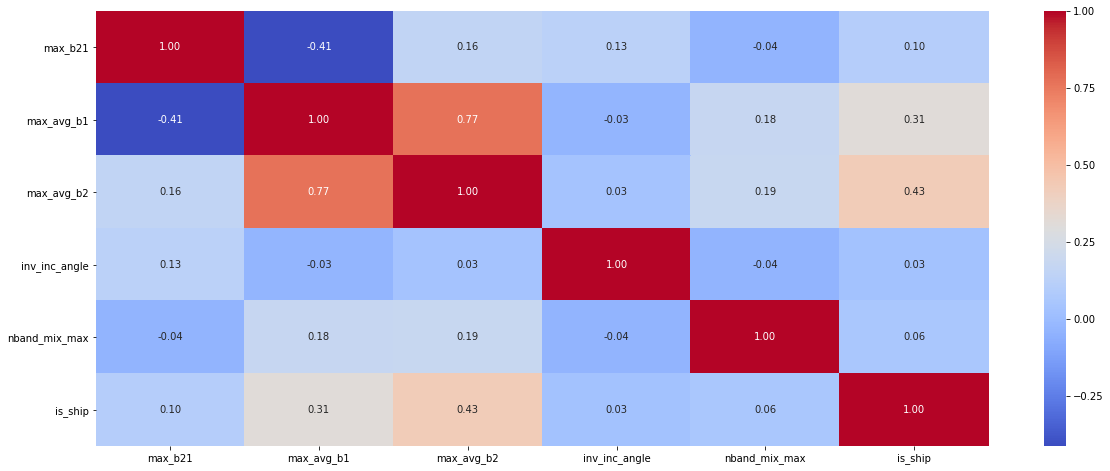

In [19]:
plt.figure(figsize=(20, 8))
g = sns.heatmap(train_df[useful_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Incidence angle

Text(0.5,0,'incidence angle')

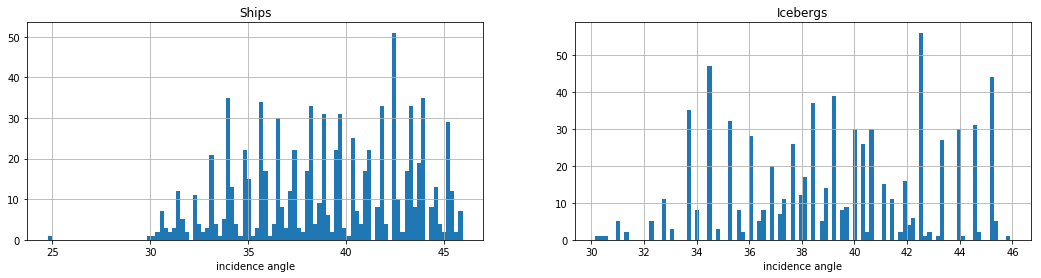

In [16]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title("Ships")    
train_ships_df['inc_angle'].hist(bins=100)
plt.xlabel("incidence angle")      
plt.subplot(122)
plt.title("Icebergs")    
train_icebergs_df['inc_angle'].hist(bins=100)
plt.xlabel("incidence angle")

Incidence angle vs max value

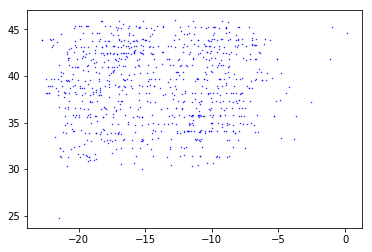

In [22]:
plt.scatter(train_ships_df['max_b2'], train_ships_df['inc_angle'], c='b', marker='.', s=0.75)

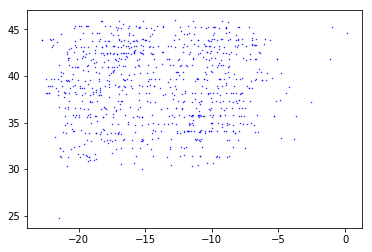

In [22]:
plt.scatter(train_ships_df['max_b2'], train_ships_df['inc_angle'], c='b', marker='.', s=0.75)

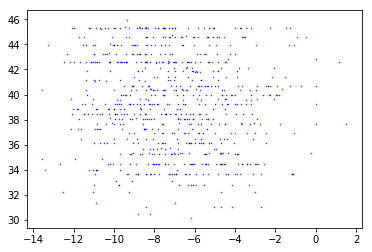

In [35]:
plt.scatter(train_icebergs_df['max_b3'], train_icebergs_df['inc_angle'], c='b', marker='.', s=0.75)

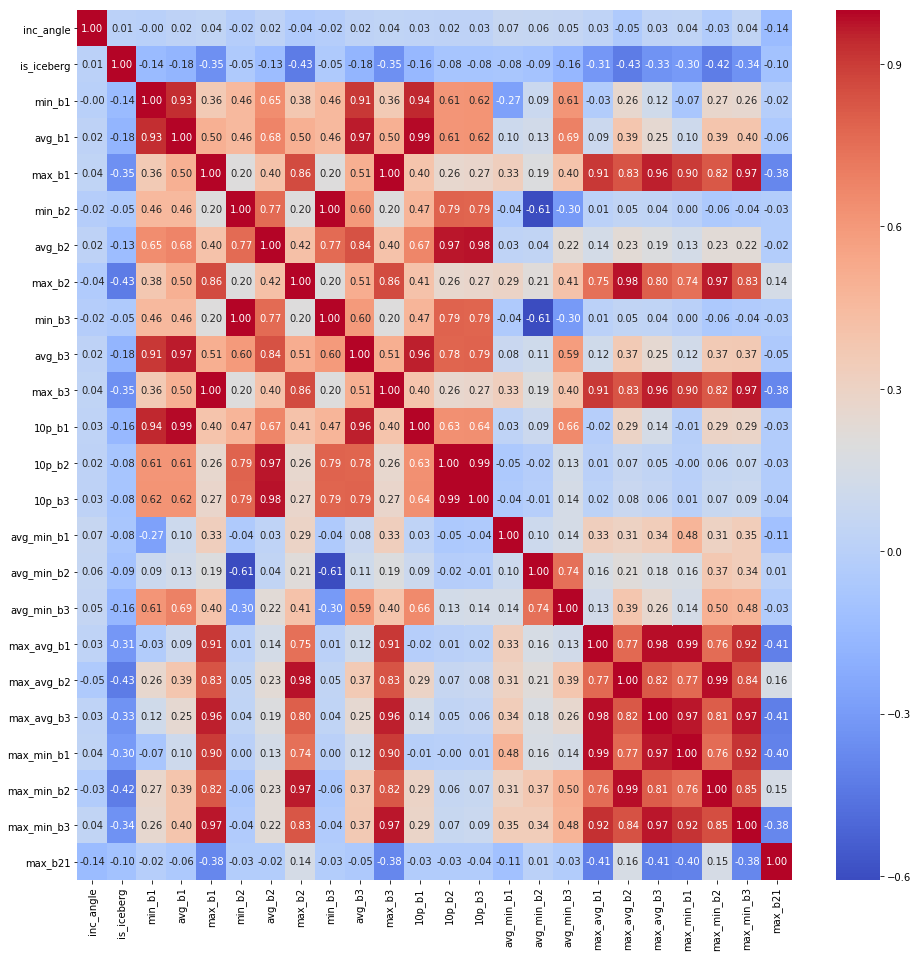

In [15]:
plt.figure(figsize=(16,16))
g = sns.heatmap(train_df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [17]:
train_df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'nband_1',
       'nband_2', 'nband_3', 'min_b1', 'avg_b1', 'max_b1', 'min_b2', 'avg_b2',
       'max_b2', 'min_b3', 'avg_b3', 'max_b3', '10p_b1', '10p_b2', '10p_b3',
       'avg_min_b1', 'avg_min_b2', 'avg_min_b3', 'max_avg_b1', 'max_avg_b2',
       'max_avg_b3', 'max_min_b1', 'max_min_b2', 'max_min_b3', 'max_b21'],
      dtype='object')

In [30]:
useful_features

['max_b21', 'max_avg_b1', 'max_avg_b2', 'inc_angle', 'nband_mix_max']

In [21]:
useful_features = [
    'inc_angle',
    'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b2', 'max_avg_b3', 'max_min_b2', 'max_min_b3', 
    'max_b21'
]

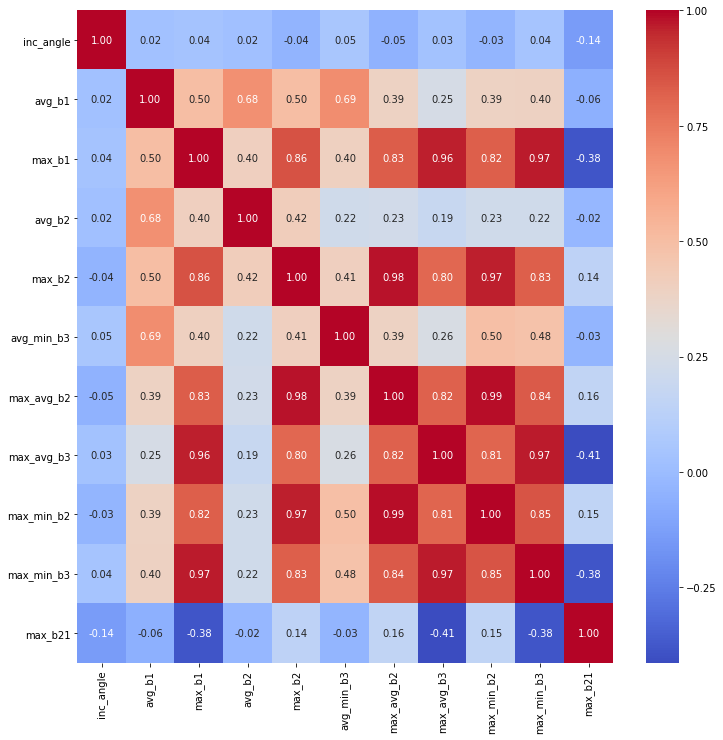

In [22]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Features of bright object

In [21]:
from common.torch_common_utils.dataflow_visu_utils import scale_percentile

In [22]:
from common.imgproc_utils import *

In [23]:
def segment_bright_object(im2):
    t = np.percentile(im2.ravel(), q=99.8)
    proc = im2.copy()
    proc[proc < t] = 0
    proc[proc > t] = 255
    proc = proc.astype(np.uint8)
    return proc

(5.8066485e-07, 0.0012167583)

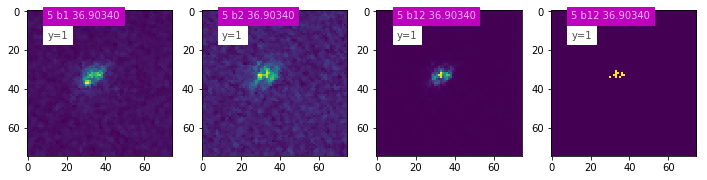

In [656]:
index = train_df.index[5]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

def to_linear(b):
    return np.power(20, 0.1 * b)

plt.figure(figsize=(12, 4))
ax = plt.subplot(141)
display_image(ax, np.power(10, 0.1 * img[:, :, 0]), index, 'b1', a, target=y)
ax = plt.subplot(142)
display_image(ax, np.power(10, 0.1 * img[:, :, 1]), index, 'b2', a, target=y)
ax = plt.subplot(143)

im2 = to_linear(img[:, :, 0]) * to_linear(img[:, :, 1])

display_image(ax, im2, index, 'b12', a, target=y)
ax = plt.subplot(144)
display_image(ax, segment_bright_object(im2), index, 'b12', a, target=y)
im2.min(), im2.max()

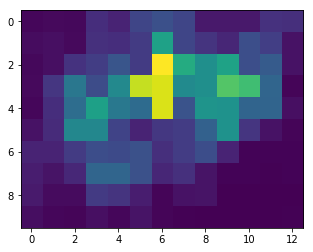

In [666]:
plt.imshow(im2[30:40, 27:40])

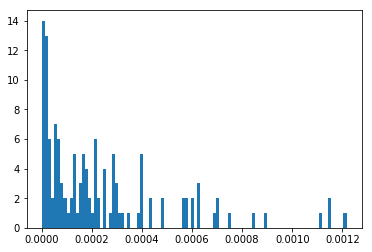

In [667]:
_ = plt.hist(im2[30:40, 27:40].ravel(), bins=100)

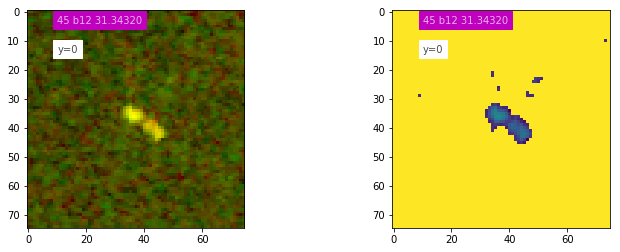

In [401]:
index = train_df.index[45]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 1], index, 'b12', a, target=y)

In [24]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    segm_img = img.copy()
    mask = segment_object(img)
    segm_img[:, :, 0] = segm_img[:, :, 0] * mask / 255.0
    segm_img[:, :, 1] = segm_img[:, :, 1] * mask / 255.0
    segm_b1 = segm_img[:, :, 0][segm_img[:, :, 0] < 0.0]
    segm_b2 = segm_img[:, :, 1][segm_img[:, :, 1] < 0.0]
    train_df.loc[i, 'obj_min_b1'] = segm_img[:, :, 0].min()
    train_df.loc[i, 'obj_max_b1'] = segm_b1.max()
    train_df.loc[i, 'obj_avg_b1'] = segm_b1.mean()
    train_df.loc[i, 'obj_min_b2'] = segm_img[:, :, 1].min()
    train_df.loc[i, 'obj_max_b2'] = segm_b2.max() 
    train_df.loc[i, 'obj_avg_b2'] = segm_b2.mean()    

In [25]:
train_df.loc[:, 'obj_avg_b21'] = train_df['obj_avg_b2'] - train_df['obj_avg_b1']
train_df.loc[:, 'obj_min_b21'] = train_df['obj_min_b2'] - train_df['obj_min_b1']
train_df.loc[:, 'obj_max_b21'] = train_df['obj_max_b2'] - train_df['obj_max_b1']

In [26]:
train_df.loc[:, 'obj_max_avg_b1'] = train_df['obj_max_b1'] - train_df['obj_avg_b1']
train_df.loc[:, 'obj_max_avg_b2'] = train_df['obj_max_b2'] - train_df['obj_avg_b2']

In [27]:
new_features = [
    'obj_max_avg_b1', 'obj_max_avg_b2'
]

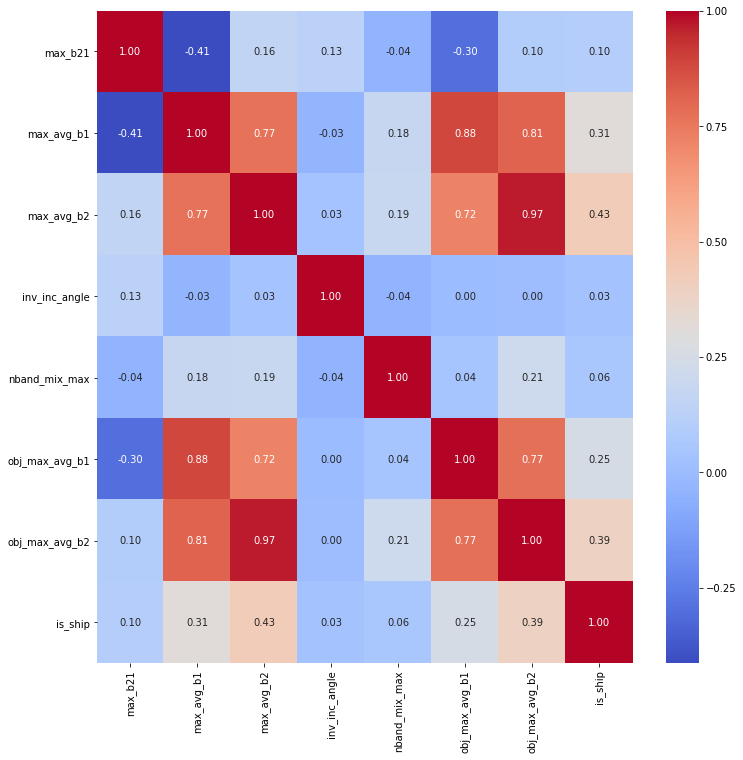

In [28]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features + new_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [29]:
useful_features = [
    'inc_angle',
    'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b3', 'max_min_b3', 
    'max_b21'
]

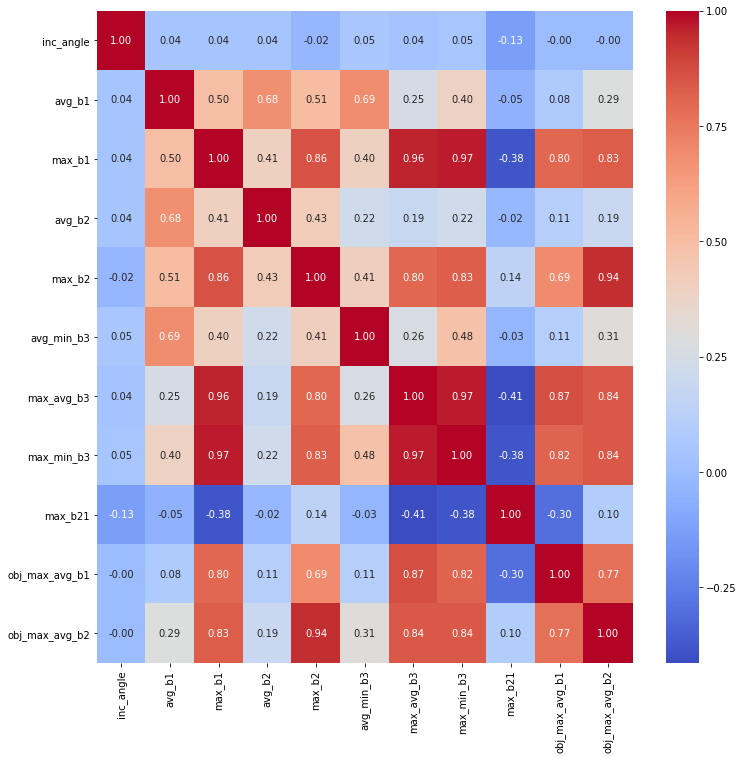

In [30]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features + new_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

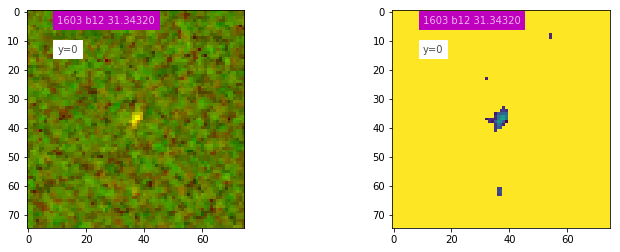

In [34]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 0], index, 'b12', a, target=y)

fft

0.000110499264416 16.2170889773 9.7857316015e-05 24.6119684757


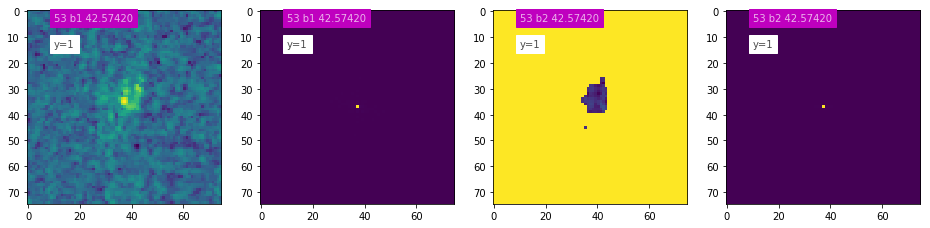

In [430]:
index = train_icebergs_df.index[25]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

mask = segment_object_(img)

img_b1_fft = fft(img[:, :, 0])
img_b2_fft = fft(img[:, :, 1])
# img_b1_fft = fft(img[:, :, 0] * mask)
# img_b2_fft = fft(img[:, :, 1] * mask)

img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()
# img_b1_fft_[img_b1_fft > img_b1_fft.max() * 0.95] = 0
# img_b2_fft_[img_b2_fft > img_b2_fft.max() * 0.95] = 0

plt.figure(figsize=(16, 4))
ax = plt.subplot(141)
display_image(ax, img[:, :, 0], index, 'b1', a, target=y)
ax = plt.subplot(142)
display_image(ax, img_b1_fft_, index, 'b1', a, target=y)

ax = plt.subplot(143)
display_image(ax, img[:, :, 1] * mask, index, 'b2', a, target=y)
ax = plt.subplot(144)
display_image(ax, img_b2_fft_, index, 'b2', a, target=y)

print(img_b1_fft.min(), img_b1_fft.max(), img_b2_fft.min(), img_b2_fft.max())

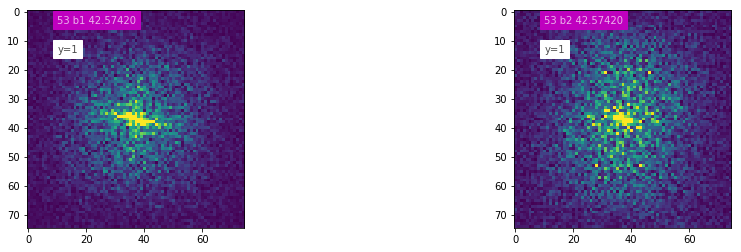

In [434]:
img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()

t1 = img_b1_fft.mean() + 3.0 * img_b1_fft.std()
img_b1_fft_[img_b1_fft > t1] = t1
t2 = img_b2_fft.mean() + 3.0 * img_b2_fft.std()
img_b2_fft_[img_b2_fft > t2] = t2

plt.figure(figsize=(16, 4))
ax = plt.subplot(121)
display_image(ax, scale_percentile(img_b1_fft_), index, 'b1', a, target=y)
ax = plt.subplot(122)
display_image(ax, scale_percentile(img_b2_fft_), index, 'b2', a, target=y)


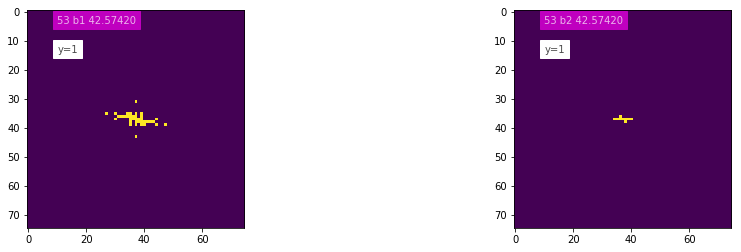

In [441]:
img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()

t1 = img_b1_fft.mean() + 3.0 * img_b1_fft.std()
img_b1_fft_[img_b1_fft > t1] = t1
t1 = img_b1_fft.mean() + 0.25 * img_b1_fft.std()
img_b1_fft_[img_b1_fft < t1] = 0
img_b1_fft_[img_b1_fft_ > 0] = 255


t1 = img_b2_fft.mean() + 3.0 * img_b2_fft.std()
img_b2_fft_[img_b2_fft > t1] = t1
t1 = img_b2_fft.mean() + 0.25 * img_b2_fft.std()
img_b2_fft_[img_b2_fft < t1] = 0
img_b2_fft_[img_b2_fft_ > 0] = 255

plt.figure(figsize=(16, 4))
ax = plt.subplot(121)
display_image(ax, scale_percentile(img_b1_fft_, q_max=100.0), index, 'b1', a, target=y)
ax = plt.subplot(122)
display_image(ax, scale_percentile(img_b2_fft_, q_max=100.0), index, 'b2', a, target=y)


7.64565330142e-05 16.9209860249 8.32275604819e-05 24.1801935106


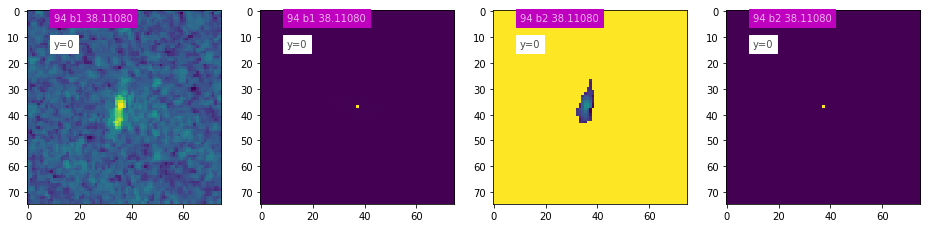

In [442]:
index = train_ships_df.index[46]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

mask = segment_object_(img)
img_b1_fft = fft(img[:, :, 0])
img_b2_fft = fft(img[:, :, 1])
# img_b1_fft = fft(img[:, :, 0] * mask)
# img_b2_fft = fft(img[:, :, 1] * mask)

img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()
# img_b1_fft_[img_b1_fft > img_b1_fft.max() * 0.95] = 0
# img_b2_fft_[img_b2_fft > img_b2_fft.max() * 0.95] = 0

plt.figure(figsize=(16, 4))
ax = plt.subplot(141)
display_image(ax, img[:, :, 0], index, 'b1', a, target=y)
ax = plt.subplot(142)
display_image(ax, img_b1_fft_, index, 'b1', a, target=y)

ax = plt.subplot(143)
display_image(ax, img[:, :, 1] * mask, index, 'b2', a, target=y)
ax = plt.subplot(144)
display_image(ax, img_b2_fft_, index, 'b2', a, target=y)

print(img_b1_fft.min(), img_b1_fft.max(), img_b2_fft.min(), img_b2_fft.max())

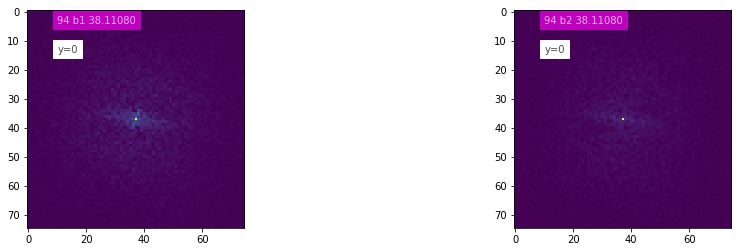

In [443]:
img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()

t1 = img_b1_fft.mean() + 3.0 * img_b1_fft.std()
img_b1_fft_[img_b1_fft > t1] = t1
t2 = img_b2_fft.mean() + 3.0 * img_b2_fft.std()
img_b2_fft_[img_b2_fft > t2] = t2

plt.figure(figsize=(16, 4))
ax = plt.subplot(121)
display_image(ax, scale_percentile(img_b1_fft_, q_max=100.0), index, 'b1', a, target=y)
ax = plt.subplot(122)
display_image(ax, scale_percentile(img_b2_fft_, q_max=100.0), index, 'b2', a, target=y)


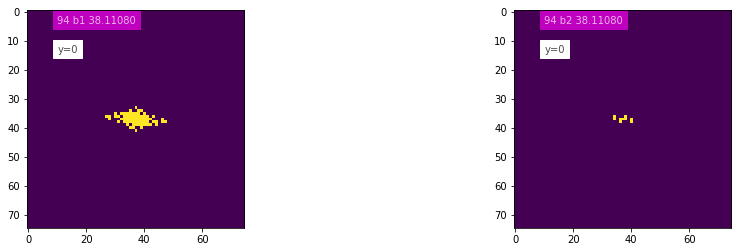

In [445]:
img_b1_fft_ = img_b1_fft.copy()
img_b2_fft_ = img_b2_fft.copy()

t1 = img_b1_fft.mean() + 3.0 * img_b1_fft.std()
img_b1_fft_[img_b1_fft > t1] = t1
t1 = img_b1_fft.mean() + 0.25 * img_b1_fft.std()
img_b1_fft_[img_b1_fft < t1] = 0
img_b1_fft_[img_b1_fft_ > 0] = 255


t1 = img_b2_fft.mean() + 3.0 * img_b2_fft.std()
img_b2_fft_[img_b2_fft > t1] = t1
t1 = img_b2_fft.mean() + 0.25 * img_b2_fft.std()
img_b2_fft_[img_b2_fft < t1] = 0
img_b2_fft_[img_b2_fft_ > 0] = 255

plt.figure(figsize=(16, 4))
ax = plt.subplot(121)
display_image(ax, scale_percentile(img_b1_fft_, q_max=100.0), index, 'b1', a, target=y)
ax = plt.subplot(122)
display_image(ax, scale_percentile(img_b2_fft_, q_max=100.0), index, 'b2', a, target=y)


In [31]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])

    mask = segment_object(img)
    img_b1_fft = fft(img[:, :, 0])
    img_b2_fft = fft(img[:, :, 1])
    
#     img_b1_fft_2 = fft(img[:, :, 0] * mask)
#     img_b2_fft_2 = fft(img[:, :, 1] * mask)
#     train_df.loc[i, 'obj_b1_fft_max'] = img_b1_fft_2.max()
#     train_df.loc[i, 'obj_b2_fft_max'] = img_b2_fft_2.max()

    train_df.loc[i, 'b1_fft_max'] = 1.0 / (img_b1_fft.max() + 1.0)
    train_df.loc[i, 'b2_fft_max'] = 1.0 / (img_b2_fft.max() + 1.0)
    
    t1 = img_b1_fft.mean() + 2*img_b1_fft.std()
    t2 = img_b2_fft.mean() + 2*img_b2_fft.std()    
    train_df.loc[i, 'b1_fft_mean_2std_count'] = np.sum(img_b1_fft > t1)
    train_df.loc[i, 'b2_fft_mean_2std_count'] = np.sum(img_b2_fft > t2)

In [348]:
def display_fft_max(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(121)
    plt.title(title)    
    df['b1_fft_max'].hist(bins=50)
    plt.xlabel("b1 fft max")    
    plt.xlim([5, 25])    
    plt.subplot(122)
    df['b2_fft_max'].hist(bins=50)
    plt.xlabel("b2 fft max")    
    plt.xlim([20, 30])    
    
# def display_obj_fft_max(df, title):
#     plt.figure(figsize=(18, 4))
#     plt.subplot(121)
#     plt.title(title)    
#     df['obj_b1_fft_max'].hist(bins=500)
#     plt.xlabel("obj b1 fft max")    
#     plt.xlim([0, 1000])    
#     plt.subplot(122)
#     df['obj_b2_fft_max'].hist(bins=500)
#     plt.xlabel("obj b2 fft max")    
#     plt.xlim([0, 1200])         

In [341]:
train_ships_df = train_df[train_df['is_iceberg'] == 0]
train_icebergs_df = train_df[train_df['is_iceberg'] == 1]

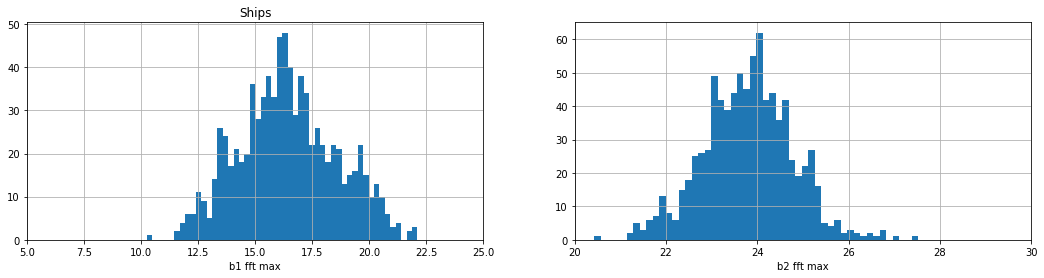

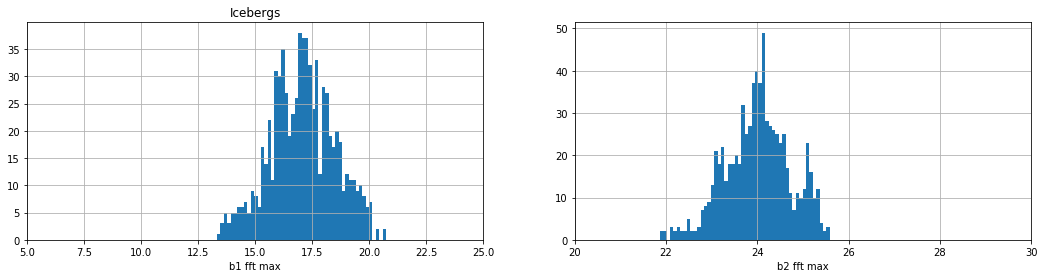

In [342]:
display_fft_max(train_ships_df, 'Ships')
display_fft_max(train_icebergs_df, 'Icebergs')

In [377]:
# display_obj_fft_max(train_ships_df, 'Ships')
# display_obj_fft_max(train_icebergs_df, 'Icebergs')

In [32]:
new_features = [
    'b1_fft_max',
    'b2_fft_max',
    'b1_fft_mean_2std_count',
    'b2_fft_mean_2std_count'
]

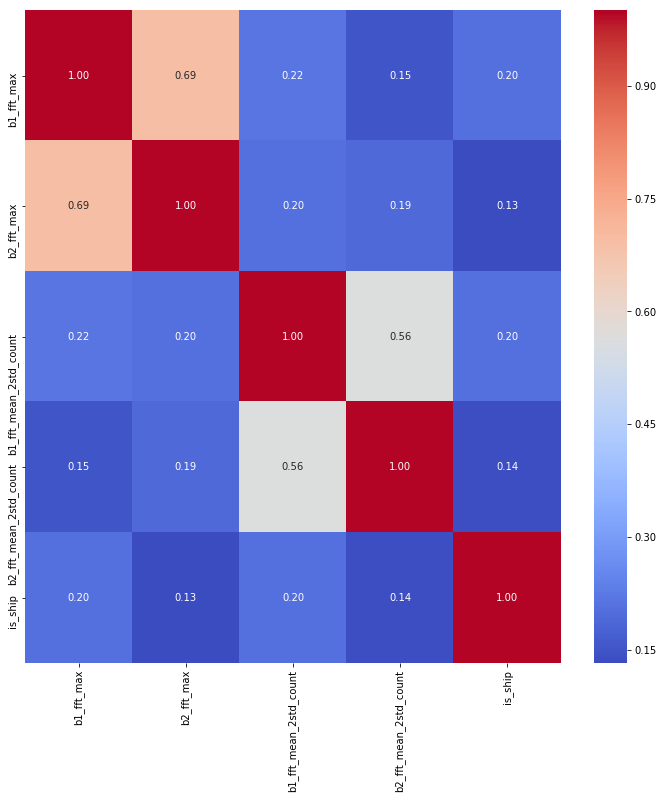

In [34]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[new_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Sea state

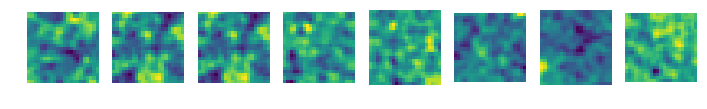

In [35]:
index = train_df.index[500]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])

proc = img[:, :, 0] + img[:, :, 1]
proc = smooth(proc, sigmaX=0.7)
sea_patches = get_sea_8_corners(proc, size=22)

plt.figure(figsize=(12, 4))
for i, c in enumerate(sea_patches):
    plt.subplot(1, len(sea_patches), i+1)
    plt.imshow(c)
    plt.axis('off')

In [41]:
sea_median = []
sea_10p = []
sea_60p = []

for p in sea_patches:
    sea_median.append(np.median(p))
    sea_10p.append(np.percentile(p, q=10.0))
    sea_60p.append(np.percentile(p, q=60.0))

sea_median = np.mean(sea_median)
sea_10p = np.mean(sea_10p)
sea_60p = np.mean(sea_60p)

In [121]:
sea_median, sea_10p, sea_60p

(-43.963245, -45.359663820266725, -43.690029621124268)

In [36]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])

    proc = img[:, :, 0] + img[:, :, 1]
    proc = smooth(proc, sigmaX=0.7)
    sea_patches = get_sea_8_corners(proc, size=18)
    
    sea_median = []
    sea_10p = []
    sea_60p = []

    for p in sea_patches:
        sea_median.append(np.median(p))
        sea_10p.append(np.percentile(p, q=10.0))
        sea_60p.append(np.percentile(p, q=60.0))

    sea_median = np.mean(sea_median)
    sea_10p = np.mean(sea_10p)
    sea_60p = np.mean(sea_60p)
    
    train_df.loc[i, 'sea_median'] = sea_median
    train_df.loc[i, 'sea_10p'] = sea_10p
    train_df.loc[i, 'sea_60p'] = sea_60p

In [37]:
new_features = [
    'sea_median',
    'sea_10p', 'sea_60p'
]

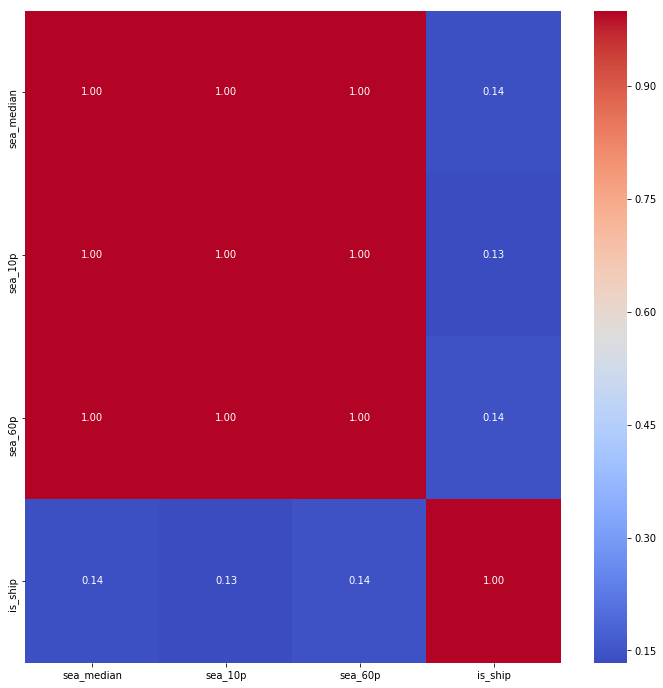

In [38]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[new_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Segmented object size 

In [39]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    obj_size = object_size(img)
    train_df.loc[i, 'obj_size'] = obj_size

In [40]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])

    mask = morpho_close(segment_object(img), ksize=3)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = contours[np.argmax([len(c) for c in contours])]

    defects = cv2.convexityDefects(biggest_contour,
                                   cv2.convexHull(biggest_contour, returnPoints=False))
    if defects is not None:
        defects = (np.min(defects[:,0,-1]), np.max(defects[:,0,-1]), np.mean(defects[:,0,-1]), len(defects[:,0,-1]))
    else:
        defects = (0, 0, 0, 0)
    train_df.loc[i, 'obj_length'] = cv2.arcLength(biggest_contour, closed=True)
    train_df.loc[i, 'obj_area'] = cv2.contourArea(biggest_contour)    
    train_df.loc[i, 'obj_cnvx_def_min'] = defects[0]
    train_df.loc[i, 'obj_cnvx_def_max'] = defects[1]
    train_df.loc[i, 'obj_cnvx_def_mean'] = defects[2]
    train_df.loc[i, 'obj_n_cnvx_def'] = defects[3]

In [41]:
train_df.loc[:, 'obj_f1'] = (train_df['obj_length'] * train_df['obj_length']) / (train_df['obj_area'] + 1e-10)

In [42]:
new_features = [
    'obj_f1', 'obj_size', 'obj_area',
    'obj_cnvx_def_min', 'obj_cnvx_def_mean','obj_cnvx_def_max', 'obj_n_cnvx_def'    
]

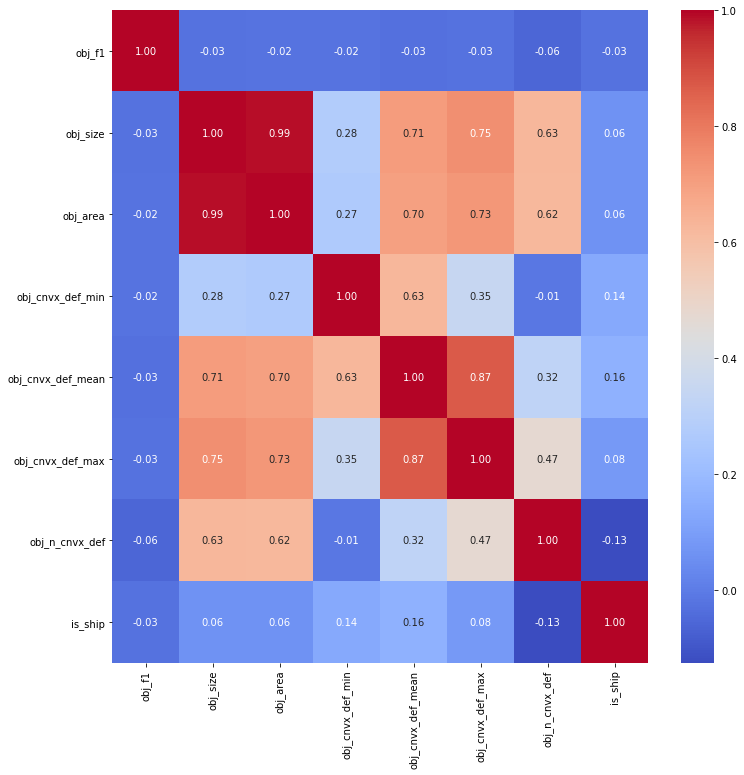

In [43]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[new_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [44]:
for name in ['obj_f1', 'obj_n_cnvx_def']:
    new_name = 'inv_%s' % name
    train_df.loc[:, new_name] = train_df[name].apply(lambda x: 1.0/(x + 1.0))

In [45]:
train_df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'is_ship',
       'nband_1', 'nband_2', 'nband_3', 'min_b1', 'avg_b1', 'max_b1', 'min_b2',
       'avg_b2', 'max_b2', 'min_b3', 'avg_b3', 'max_b3', '10p_b1', '10p_b2',
       '10p_b3', 'nband_mix', 'avg_min_b1', 'avg_min_b2', 'avg_min_b3',
       'max_avg_b1', 'max_avg_b2', 'max_avg_b3', 'max_min_b1', 'max_min_b2',
       'max_min_b3', 'max_b21', 'nband_mix_max', 'inv_max_b21',
       'inv_max_avg_b1', 'inv_max_avg_b2', 'inv_inc_angle',
       'inv_nband_mix_max', 'obj_min_b1', 'obj_max_b1', 'obj_avg_b1',
       'obj_min_b2', 'obj_max_b2', 'obj_avg_b2', 'obj_avg_b21', 'obj_min_b21',
       'obj_max_b21', 'obj_max_avg_b1', 'obj_max_avg_b2', 'b1_fft_max',
       'b2_fft_max', 'b1_fft_mean_2std_count', 'b2_fft_mean_2std_count',
       'sea_median', 'sea_10p', 'sea_60p', 'obj_size', 'obj_length',
       'obj_area', 'obj_cnvx_def_min', 'obj_cnvx_def_max', 'obj_cnvx_def_mean',
       'obj_n_cnvx_def', 'obj_f1', 'inv_obj_f1', 'inv_ob

In [46]:
useful_features = [
    'inc_angle',
    'max_b21', 'obj_max_avg_b1', 'obj_max_avg_b2',
    'obj_n_cnvx_def', 
    'obj_f1', 'obj_area', 'obj_cnvx_def_min', 'obj_cnvx_def_mean', 'obj_cnvx_def_max',
]


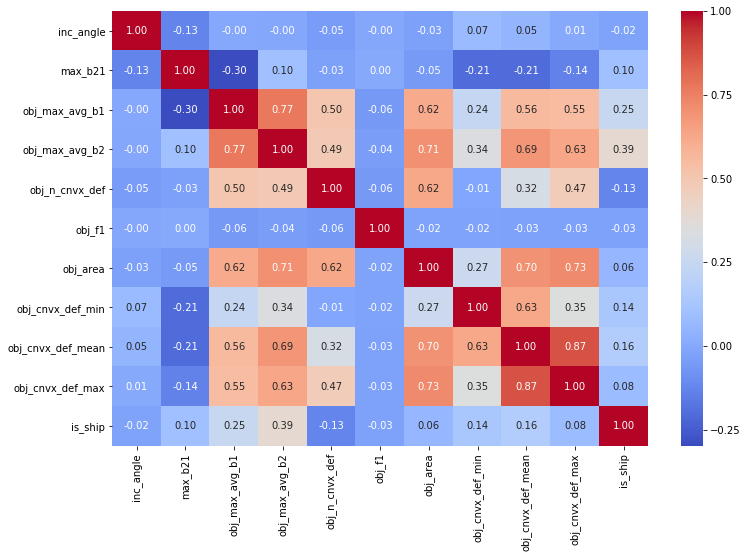

In [47]:
plt.figure(figsize=(12, 8))
g = sns.heatmap(train_df[useful_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Segmented object moments

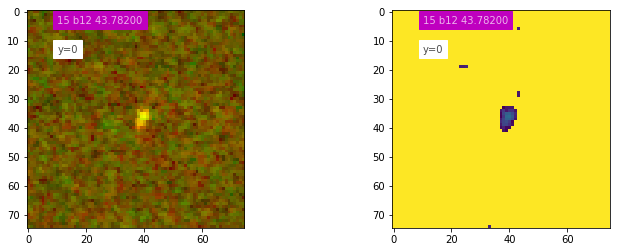

In [59]:
index = train_df.index[15]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 1], index, 'b12', a, target=y)

In [60]:
import cv2

In [61]:
mask = morpho_close(segment_object(img), ksize=3)
mm = cv2.HuMoments(cv2.moments(segment_object(img)))
mm, len(mm), mm[0][0]

(array([[  6.65020891e-03],
        [  1.74925799e-05],
        [  6.64311000e-07],
        [  1.15986200e-07],
        [ -3.16233885e-14],
        [ -4.22743113e-10],
        [ -6.04248764e-15]]), 7, 0.0066502089147092505)

In [48]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    mask = morpho_close(segment_object(img), ksize=3)
    mm = cv2.HuMoments(cv2.moments(mask))
    train_df.loc[i, 'obj_m0'] = mm[0][0]
    train_df.loc[i, 'obj_m1'] = mm[1][0]
    train_df.loc[i, 'obj_m2'] = mm[2][0]
    train_df.loc[i, 'obj_m3'] = mm[3][0]
    train_df.loc[i, 'obj_m4'] = mm[4][0]
    train_df.loc[i, 'obj_m5'] = mm[5][0]
    train_df.loc[i, 'obj_m6'] = mm[6][0]

In [49]:
useful_features = [
    'inc_angle',
    'max_b21',    'obj_max_avg_b1',    'obj_max_avg_b2',
    'obj_n_cnvx_def',
    'obj_f1',    'obj_area', 'obj_cnvx_def_min',     'obj_cnvx_def_mean',     'obj_cnvx_def_max',
    'obj_m2', 'obj_m3', 
    'sea_median',
    'b1_fft_max',
    'b2_fft_max',
    'b1_fft_mean_2std_count',
    'b2_fft_mean_2std_count'
]

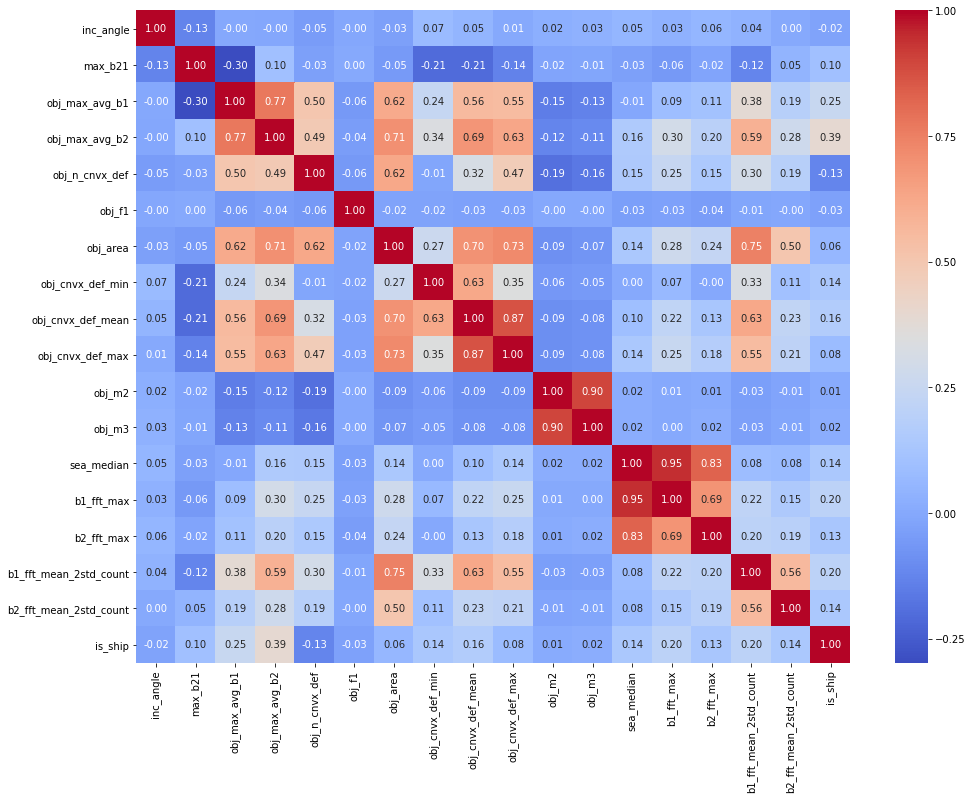

In [50]:
plt.figure(figsize=(16, 12))
g = sns.heatmap(train_df[useful_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Distance in pixels between max b1 and max b2

In [150]:
def normalize(img, q_min, q_max):
    for i in range(img.shape[2]):
        b = img[:, :, i]
        t1 = np.percentile(b, q=q_min)
        t2 = np.percentile(b, q=q_max)
        b[b < t1] = t1
        b[b > t2] = t2
        img[:, :, i] = (b - t1) / (t2 - t1 + 1e-10)
    return img

3.0


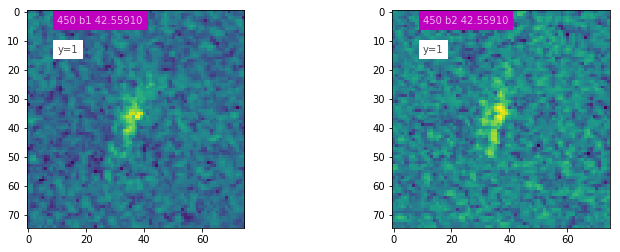

In [155]:
index = train_df.index[450]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img[:, :, 0], index, 'b1', a, target=y)
ax = plt.subplot(122)
display_image(ax, img[:, :, 1], index, 'b2', a, target=y)
# ax = plt.subplot(133)
# im_norm = normalize(img, q_min=0.0, q_max=99.7)
# display_image(ax, im_norm[:, :, 0] + im_norm[:, :, 1], index, 'b2', a, target=y)

h, w, c = img.shape
p1 = np.unravel_index(np.argmax(img[:, :, 0]), (h, w))
p2 = np.unravel_index(np.argmax(img[:, :, 1]), (h, w))
print(np.linalg.norm(np.array(p1) - np.array(p2)))

In [165]:
index = 0
t1 = np.percentile(img[:, :, index], q=99.8)
t2 = np.percentile(img[:, :, index], q=100.0) 
pts = np.argwhere((img[:, :, index] > t1) & (img[:, :, index] < t2))
p1 = np.mean(pts, axis=0)
pts, p1

(array([[36, 36],
        [36, 37],
        [36, 38],
        [36, 39],
        [37, 36],
        [37, 37],
        [37, 39],
        [38, 36],
        [38, 37],
        [39, 36]]), array([ 37. ,  37.1]))

In [166]:
index = 1
t1 = np.percentile(img[:, :, index], q=99.8)
t2 = np.percentile(img[:, :, index], q=100.0) 
pts = np.argwhere((img[:, :, index] > t1) & (img[:, :, index] < t2))
p2 = np.mean(pts, axis=0)
pts, p2

(array([[35, 37],
        [35, 38],
        [35, 39],
        [36, 36],
        [36, 37],
        [36, 38],
        [37, 36],
        [37, 38],
        [38, 36],
        [38, 37],
        [39, 36]]), array([ 36.54545455,  37.09090909]))

In [168]:
p1 - p2

array([ 0.45454545,  0.00909091])

In [126]:
p1 = np.unravel_index(np.argmax(img[:, :, 0]), (h, w))
p2 = np.unravel_index(np.argmax(img[:, :, 1]), (h, w))
p1, p2

((36, 37), (33, 37))

In [51]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    
    h, w, c = img.shape
    p1 = np.unravel_index(np.argmax(img[:, :, 0]), (h, w))
    p2 = np.unravel_index(np.argmax(img[:, :, 1]), (h, w))
    train_df.loc[i, 'dist_max_b12'] = 1.0 / (np.linalg.norm(np.array(p1) - np.array(p2)) + 1.0)
    
    index = 0
    t1 = np.percentile(img[:, :, index], q=99.8)
    t2 = np.percentile(img[:, :, index], q=100.0) 
    pts = np.argwhere((img[:, :, index] > t1) & (img[:, :, index] < t2))
    p1 = np.mean(pts, axis=0)

    index = 1
    t1 = np.percentile(img[:, :, index], q=99.8)
    t2 = np.percentile(img[:, :, index], q=100.0) 
    pts = np.argwhere((img[:, :, index] > t1) & (img[:, :, index] < t2))
    p2 = np.mean(pts, axis=0)
    
    train_df.loc[i, 'dist_almost_max_b12'] = 1.0 / (np.linalg.norm(p1 - p2) + 1.0)

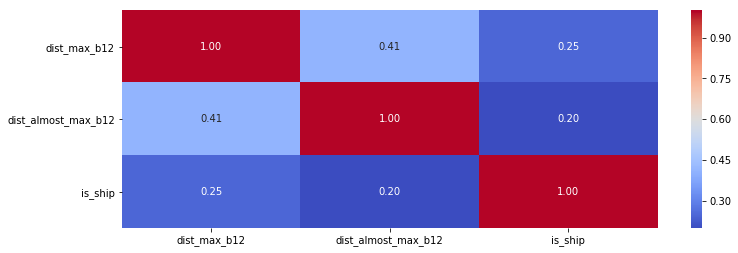

In [52]:
plt.figure(figsize=(12, 4))
g = sns.heatmap(train_df[['dist_max_b12', 'dist_almost_max_b12', 'is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [67]:
useful_features = [
    'inv_inc_angle',
    'max_b21',    'obj_max_avg_b1',    'obj_max_avg_b2',
    'inv_obj_n_cnvx_def',
    'obj_area', 'obj_cnvx_def_min',     'obj_cnvx_def_mean',     'obj_cnvx_def_max',
    'obj_m2', 'obj_m3', 
    'sea_median',
    'b1_fft_max',
    'b2_fft_max',
    'b1_fft_mean_2std_count',
    'b2_fft_mean_2std_count', 
    'dist_max_b12', 
    'dist_almost_max_b12'
]

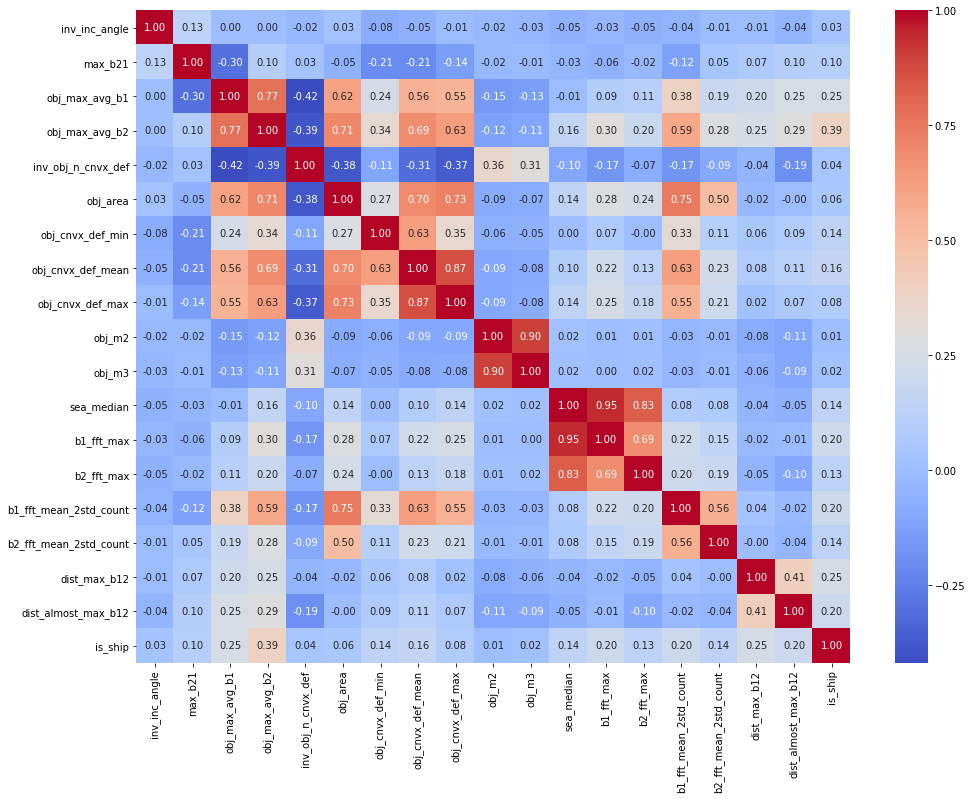

In [68]:
plt.figure(figsize=(16, 12))
g = sns.heatmap(train_df[useful_features + ['is_ship']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Setup features for boosting

In [69]:
useful_features

['inv_inc_angle',
 'max_b21',
 'obj_max_avg_b1',
 'obj_max_avg_b2',
 'inv_obj_n_cnvx_def',
 'obj_area',
 'obj_cnvx_def_min',
 'obj_cnvx_def_mean',
 'obj_cnvx_def_max',
 'obj_m2',
 'obj_m3',
 'sea_median',
 'b1_fft_max',
 'b2_fft_max',
 'b1_fft_mean_2std_count',
 'b2_fft_mean_2std_count',
 'dist_max_b12',
 'dist_almost_max_b12']

In [70]:
features = train_df[useful_features]
labels = train_df['is_ship']

Training

In [71]:
import xgboost as xgb
dtrainval = xgb.DMatrix(features, label=labels)

In [72]:
seed = np.random.randint(5555)
n_folds = 10

params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eval_metric": "logloss",
    "eta": None,
    "tree_method": 'auto',
    "max_depth": None,
    "subsample": None,
    "colsample_bytree": None,
    "silent": 1,
    "seed": None,
}

best_params = {
    'test-%s-mean' % params['eval_metric']: 1e10,
    'test-train diff': 1e10,
    'params': {},
    'num_boost_round': 0
}

# Search for the best parameters using CV
def generate_params():
    eta = np.random.uniform(0.01, 0.00005)
    max_depth = np.random.randint(2, 5)
    subsample = np.random.uniform(0.5, 0.98)
    colsample_bytree = np.random.uniform(0.5, 0.98)
    return eta, max_depth, subsample, colsample_bytree

In [73]:
np.random.seed(seed)
for i in range(100):

    eta, max_depth, subsample, colsample_bytree = generate_params()
    i += 1
    seed += i
    print('\n{} : XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'
          .format(i, eta, max_depth, subsample, colsample_bytree))
    num_boost_round = 200000
    early_stopping_rounds = 1000

    params['eta'] = eta
    params['max_depth'] = max_depth
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample_bytree
    params['seed'] = seed

    cvresult = xgb.cv(params, dtrain=dtrainval,
                      seed=params['seed'],
                      num_boost_round=num_boost_round,
                      early_stopping_rounds=early_stopping_rounds,
                      nfold=n_folds,
                      stratified=True,
                      verbose_eval=early_stopping_rounds)

    min_test_eval_metric_mean = cvresult['test-%s-mean' % params['eval_metric']].min()
    min_train_eval_metric_mean = cvresult['train-%s-mean' % params['eval_metric']].min()
    test_train_diff = min_test_eval_metric_mean - min_train_eval_metric_mean
    if best_params['test-%s-mean' % params['eval_metric']] > min_test_eval_metric_mean:
            
        best_params['test-%s-mean' % params['eval_metric']] = min_test_eval_metric_mean
        best_params['train-%s-mean' % params['eval_metric']] = min_train_eval_metric_mean
        best_params['test-train diff'] = test_train_diff
        best_params['params'] = dict(params)
        best_params['num_boost_round'] = len(cvresult)
        print("Best cv result: ", cvresult.loc[cvresult.index[-1], :])
        print("Best params: ", params)


1 : XGBoost params. ETA: 0.009236440565375599, MAX_DEPTH: 3, SUBSAMPLE: 0.8631775495384792, COLSAMPLE_BY_TREE: 0.7153375785002827
[0]	train-logloss:0.689691+0.000349793	test-logloss:0.689927+0.000483669
[1000]	train-logloss:0.242518+0.00411565	test-logloss:0.341986+0.0457569
[2000]	train-logloss:0.160538+0.0039935	test-logloss:0.318324+0.056385
[3000]	train-logloss:0.11191+0.00325186	test-logloss:0.311198+0.0651327
[4000]	train-logloss:0.0803939+0.00258986	test-logloss:0.308828+0.0711068
[5000]	train-logloss:0.0594947+0.00203976	test-logloss:0.310237+0.0752958
Best cv result:  test-logloss-mean     0.308754
test-logloss-std      0.071096
train-logloss-mean    0.080175
train-logloss-std     0.002591
Name: 4009, dtype: float64
Best params:  {'subsample': 0.8631775495384792, 'max_depth': 3, 'tree_method': 'auto', 'seed': 2134, 'booster': 'gbtree', 'eta': 0.009236440565375599, 'objective': 'binary:logistic', 'eval_metric': 'logloss', 'colsample_bytree': 0.7153375785002827, 'silent': 1}

2

KeyboardInterrupt: 

In [74]:
best_params

{'num_boost_round': 4010,
 'params': {'booster': 'gbtree',
  'colsample_bytree': 0.7153375785002827,
  'eta': 0.009236440565375599,
  'eval_metric': 'logloss',
  'max_depth': 3,
  'objective': 'binary:logistic',
  'seed': 2134,
  'silent': 1,
  'subsample': 0.8631775495384792,
  'tree_method': 'auto'},
 'test-logloss-mean': 0.30875350000000001,
 'test-train diff': 0.228579,
 'train-logloss-mean': 0.08017450000000001}

In [75]:
# Train model
dtrain = xgb.DMatrix(features, label=labels)
model = xgb.train(best_params['params'],
                  dtrain,
                  num_boost_round=best_params['num_boost_round'],
                  evals=[(dtrain, 'train')], 
                  verbose_eval=500)

[0]	train-logloss:0.68963
[500]	train-logloss:0.323755
[1000]	train-logloss:0.246837
[1500]	train-logloss:0.201294
[2000]	train-logloss:0.167715
[2500]	train-logloss:0.14038
[3000]	train-logloss:0.118279
[3500]	train-logloss:0.100522
[4000]	train-logloss:0.085944


In [76]:
from operator import itemgetter

sorted(list(model.get_fscore().items()), key=itemgetter(1), reverse=True)

[('inv_inc_angle', 3551),
 ('obj_max_avg_b2', 2124),
 ('obj_area', 2099),
 ('b1_fft_max', 2043),
 ('obj_max_avg_b1', 1955),
 ('max_b21', 1686),
 ('sea_median', 1562),
 ('b2_fft_max', 1508),
 ('dist_almost_max_b12', 1439),
 ('dist_max_b12', 1320),
 ('obj_cnvx_def_mean', 1276),
 ('obj_m3', 1178),
 ('obj_m2', 1081),
 ('obj_cnvx_def_max', 699),
 ('inv_obj_n_cnvx_def', 619),
 ('obj_cnvx_def_min', 489),
 ('b1_fft_mean_2std_count', 115),
 ('b2_fft_mean_2std_count', 2)]

```
[('inv_max_avg_b2', 4226),
 ('inc_angle', 3832),
 ('inv_obj_area', 3198),
 ('inv_obj_f1', 2907),
 ('inv_max_avg_b1', 2856),
 ('b1_fft_max', 2697),
 ('inv_max_b21', 2598),
 ('sea_median', 2152),
 ('b2_fft_max', 2135),
 ('obj_m2', 1967),
 ('inv_obj_cnvx_def_max', 1796),
 ('inv_obj_cnvx_def_mean', 1741),
 ('obj_m3', 1693),
 ('obj_n_cnvx_def', 1129),
 ('inv_obj_cnvx_def_min', 702),
 ('b1_fft_mean_2std_count', 142),
 ('b2_fft_mean_2std_count', 7)]
```

In [488]:
useful_features

['inc_angle',
 'inv_max_b21',
 'inv_max_avg_b1',
 'inv_max_avg_b2',
 'obj_n_cnvx_def',
 'inv_obj_f1',
 'inv_obj_area',
 'inv_obj_cnvx_def_min',
 'inv_obj_cnvx_def_mean',
 'inv_obj_cnvx_def_max',
 'obj_m2',
 'obj_m3',
 'sea_median',
 'b1_fft_max',
 'b2_fft_max',
 'b1_fft_mean_2std_count',
 'b2_fft_mean_2std_count']

## Pseudo-labelling

In [465]:
import pandas as pd


filename = "../output/processed_test.csv"
test_df = pd.read_csv(filename)

In [467]:
dtest = xgb.DMatrix(test_df[useful_features])
y_probas = model.predict(dtest)
y_probas.shape

(5169,)

In [468]:
pseudo_train_df = test_df.copy()
pseudo_train_df.loc[:, 'is_iceberg'] = (y_probas > 0.5).astype(np.uint8)

In [473]:
pseudo_train_df = pd.concat([pseudo_train_df, train_df])

In [476]:
pseudo_train_df.head()

,10p_b1,10p_b2,10p_b3,avg_b1,avg_b2,avg_b3,avg_min_b1,avg_min_b2,avg_min_b3,b1_fft_max,...,obj_m2,obj_m3,obj_m4,obj_m5,obj_m6,obj_n_cnvx_def,obj_size,sea_10p,sea_60p,sea_median
0,NaN,NaN,NaN,-15.371133,-23.462206,NaN,NaN,NaN,NaN,15.371133,...,4.312532e-06,4.536435e-06,NaN,NaN,NaN,3.0,NaN,NaN,NaN,-0.025616
1,NaN,NaN,NaN,-14.622880,-23.324310,NaN,NaN,NaN,NaN,16.241143,...,5.791791e-10,3.933002e-10,NaN,NaN,NaN,8.0,NaN,NaN,NaN,-0.024340
2,NaN,NaN,NaN,-18.736792,-25.754990,NaN,NaN,NaN,NaN,15.305057,...,5.489029e-09,4.751696e-09,NaN,NaN,NaN,5.0,NaN,NaN,NaN,-0.025407
3,NaN,NaN,NaN,-16.241143,-24.341132,NaN,NaN,NaN,NaN,15.681252,...,2.188390e-10,3.403716e-10,NaN,NaN,NaN,7.0,NaN,NaN,NaN,-0.025244
4,NaN,NaN,NaN,-16.770973,-23.679804,NaN,NaN,NaN,NaN,19.902671,...,6.735417e-09,1.384971e-08,NaN,NaN,NaN,5.0,NaN,NaN,NaN,-0.022421


In [477]:
features = pseudo_train_df[useful_features]
labels = pseudo_train_df['is_iceberg']


dtrainval = xgb.DMatrix(features, label=labels)

In [478]:
seed = np.random.randint(5555)
n_folds = 7

params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eval_metric": "logloss",
    "eta": None,
    "tree_method": 'auto',
    "max_depth": None,
    "subsample": None,
    "colsample_bytree": None,
    "silent": 1,
    "seed": None,
}

best_params = {
    'test-%s-mean' % params['eval_metric']: 1e10,
    'test-train diff': 1e10,
    'params': {},
    'num_boost_round': 0
}

# Search for the best parameters using CV
def generate_params():
    eta = np.random.uniform(0.01, 0.00005)
    max_depth = np.random.randint(2, 5)
    subsample = np.random.uniform(0.5, 0.98)
    colsample_bytree = np.random.uniform(0.5, 0.98)
    return eta, max_depth, subsample, colsample_bytree

In [479]:
np.random.seed(seed)
for i in range(100):

    eta, max_depth, subsample, colsample_bytree = generate_params()
    i += 1
    seed += i
    print('\n{} : XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'
          .format(i, eta, max_depth, subsample, colsample_bytree))
    num_boost_round = 200000
    early_stopping_rounds = 1000

    params['eta'] = eta
    params['max_depth'] = max_depth
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample_bytree
    params['seed'] = seed

    cvresult = xgb.cv(params, dtrain=dtrainval,
                      seed=params['seed'],
                      num_boost_round=num_boost_round,
                      early_stopping_rounds=early_stopping_rounds,
                      nfold=n_folds,
                      stratified=True,
                      verbose_eval=early_stopping_rounds)

    min_test_eval_metric_mean = cvresult['test-%s-mean' % params['eval_metric']].min()
    min_train_eval_metric_mean = cvresult['train-%s-mean' % params['eval_metric']].min()
    test_train_diff = min_test_eval_metric_mean - min_train_eval_metric_mean
    if best_params['test-%s-mean' % params['eval_metric']] > min_test_eval_metric_mean:
            
        best_params['test-%s-mean' % params['eval_metric']] = min_test_eval_metric_mean
        best_params['train-%s-mean' % params['eval_metric']] = min_train_eval_metric_mean
        best_params['test-train diff'] = test_train_diff
        best_params['params'] = dict(params)
        best_params['num_boost_round'] = len(cvresult)
        print("Best cv result: ", cvresult.loc[cvresult.index[-1], :])
        print("Best params: ", params)


1 : XGBoost params. ETA: 0.0019958867446176493, MAX_DEPTH: 2, SUBSAMPLE: 0.875835900534395, COLSAMPLE_BY_TREE: 0.9636575891616328
[0]	train-logloss:0.69203+2.8212e-06	test-logloss:0.692038+1.57338e-05
[1000]	train-logloss:0.325431+0.000775766	test-logloss:0.330804+0.00360149
[2000]	train-logloss:0.255831+0.000793065	test-logloss:0.264637+0.00391861
[3000]	train-logloss:0.221827+0.000642054	test-logloss:0.233105+0.00351481
[4000]	train-logloss:0.200559+0.000500328	test-logloss:0.213955+0.00306968
[5000]	train-logloss:0.185226+0.000458682	test-logloss:0.200626+0.0026818
[6000]	train-logloss:0.173116+0.0005284	test-logloss:0.190463+0.00224186
[7000]	train-logloss:0.163261+0.000622128	test-logloss:0.182645+0.00189905
[8000]	train-logloss:0.154898+0.000661713	test-logloss:0.176242+0.00185092
[9000]	train-logloss:0.14755+0.000659717	test-logloss:0.170795+0.00208704
[10000]	train-logloss:0.14119+0.000620926	test-logloss:0.166188+0.00242561
[11000]	train-logloss:0.135414+0.000652992	test-logl

KeyboardInterrupt: 

In [480]:
best_params

{'num_boost_round': 77725,
 'params': {'booster': 'gbtree',
  'colsample_bytree': 0.9636575891616328,
  'eta': 0.0019958867446176493,
  'eval_metric': 'logloss',
  'max_depth': 2,
  'objective': 'binary:logistic',
  'seed': 1039,
  'silent': 1,
  'subsample': 0.875835900534395,
  'tree_method': 'auto'},
 'test-logloss-mean': 0.11412628571428572,
 'test-train diff': 0.082412714285714284,
 'train-logloss-mean': 0.031713571428571431}

In [481]:
# Train model
dtrain = xgb.DMatrix(features, label=labels)
model = xgb.train(best_params['params'],
                  dtrain,
                  num_boost_round=best_params['num_boost_round'],
                  evals=[(dtrain, 'train')], 
                  verbose_eval=500)

[0]	train-logloss:0.69203
[500]	train-logloss:0.416339
[1000]	train-logloss:0.326138
[1500]	train-logloss:0.28268
[2000]	train-logloss:0.256695
[2500]	train-logloss:0.237538
[3000]	train-logloss:0.222828
[3500]	train-logloss:0.21135
[4000]	train-logloss:0.201924
[4500]	train-logloss:0.193835
[5000]	train-logloss:0.186648
[5500]	train-logloss:0.180333
[6000]	train-logloss:0.174693
[6500]	train-logloss:0.169685
[7000]	train-logloss:0.165078
[7500]	train-logloss:0.160852
[8000]	train-logloss:0.156887
[8500]	train-logloss:0.153277
[9000]	train-logloss:0.149783
[9500]	train-logloss:0.146547
[10000]	train-logloss:0.143622
[10500]	train-logloss:0.140757
[11000]	train-logloss:0.138016
[11500]	train-logloss:0.135357
[12000]	train-logloss:0.132876
[12500]	train-logloss:0.130429
[13000]	train-logloss:0.128117
[13500]	train-logloss:0.125887
[14000]	train-logloss:0.123711
[14500]	train-logloss:0.121654
[15000]	train-logloss:0.119619
[15500]	train-logloss:0.117795
[16000]	train-logloss:0.115993
[165

In [482]:
from operator import itemgetter

sorted(list(model.get_fscore().items()), key=itemgetter(1), reverse=True)

[('inc_angle', 41049),
 ('inv_max_avg_b2', 30747),
 ('inv_max_avg_b1', 21902),
 ('inv_max_b21', 20185),
 ('inv_obj_f1', 16696),
 ('inv_obj_area', 15480),
 ('b1_fft_max', 15235),
 ('b2_fft_max', 12022),
 ('obj_m2', 10933),
 ('obj_m3', 10014),
 ('sea_median', 9877),
 ('inv_obj_cnvx_def_mean', 9641),
 ('inv_obj_cnvx_def_max', 6659),
 ('obj_n_cnvx_def', 3815),
 ('inv_obj_cnvx_def_min', 2724),
 ('b1_fft_mean_2std_count', 1175),
 ('b2_fft_mean_2std_count', 2)]

In [483]:
filename = "../output/processed_full_test.csv"
test_df = pd.read_csv(filename)

In [484]:
dtest = xgb.DMatrix(test_df[useful_features])
y_probas = model.predict(dtest)
y_probas = np.expand_dims(y_probas, axis=-1)

In [486]:
from common import write_submission

In [487]:
output_filename = os.path.join("..", "results", "submission__xbg_17_features_pseudo_labelling_val=0.114.csv")
write_submission(output_filename, y_probas, proba_thresholds=[0.01, 0.99])